In [2]:
import numpy as np
def AND_gate(x):
    w1=0.5
    w2=0.5
    b=-0.7

    result =x[0]*w1 + x[1]*w2 + b
    if result <=0:
        return 0
    else:
        return 1

In [3]:
def OR_gate(x):
    w1=0.6
    w2=0.6
    b=-0.5
    result =x[0]*w1 + x[1]*w2 + b
    if result <=0:
        return 0
    else:
        return 1

In [4]:
def NAND_gate(x):
    w1=-0.5
    w2=-0.5
    b=0.7

    result =x[0]*w1 + x[1]*w2 + b
    if result <=0:
        return 0
    else:
        return 1

In [5]:
input_data=np.array([[0,0],[0,1],[1,0],[1,1]])
result=[]
for x in input_data:
    result.append(NAND_gate(x))

print(result)

[1, 1, 1, 0]


In [6]:
input_data=np.array([[0,0],[0,1],[1,0],[1,1]])
s1=[] # NAND의 결과
s2=[] # OR의 결과
new_input=[] #s1, s2을로 AND의 입력값 저장 배열
final_result=[] 

for i in range(len(input_data)):
    s1=NAND_gate(input_data[i])
    s2=OR_gate(input_data[i])

    new_input.append(s1)
    new_input.append(s2)
    print(new_input)
    result=AND_gate(new_input)
    final_result.append(result)
    new_input=[]

print(final_result)

[1, 0]
[1, 1]
[1, 1]
[0, 1]
[0, 1, 1, 0]


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

X=torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]])
Y=torch.FloatTensor([[0],[1],[1],[0]])

linear=nn.Linear(2,1, bias=True)
simoid=nn.Sigmoid()
model=nn.Sequential(linear, simoid)
criterion=nn.BCELoss()
optimirzer=optim.SGD(model.parameters(), lr=1)

In [8]:
for step in range(10001):
    optimirzer.zero_grad()
    h=model(X)

    cost=criterion(h, Y)
    cost.backward()
    optimirzer.step()

    if step % 100==0:
        print(step, cost.item())

0 0.7235149145126343
100 0.6931473016738892
200 0.6931471824645996
300 0.6931471228599548
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

In [9]:
predictions=model(X)
print((predictions>0.5).float())

tensor([[0.],
        [0.],
        [0.],
        [0.]])


딥러닝 활용 XOR

In [10]:
X=torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]])
Y=torch.FloatTensor([[0],[1],[1],[0]])

In [11]:
model=nn.Sequential(
    nn.Linear(2, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10,10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10,10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 1, bias=True),
    nn.Sigmoid()
)

In [12]:
criterion=nn.BCELoss()
optimirzer=optim.SGD(model.parameters(), lr=1)

In [13]:
for epoch in range(10001):
    optimirzer.zero_grad()
    h1=model(X)
    cost=criterion(h1, Y)
    cost.backward()
    optimirzer.step()

    if epoch % 100 ==0:
        print(epoch, cost.item())

0 0.6985701322555542
100 0.6931524276733398
200 0.693151593208313
300 0.6931506991386414
400 0.6931498646736145
500 0.6931490302085876
600 0.6931481957435608
700 0.6931473612785339
800 0.6931465864181519
900 0.693145751953125
1000 0.6931449174880981
1100 0.6931440830230713
1200 0.6931430697441101
1300 0.6931421756744385
1400 0.6931412816047668
1500 0.6931403875350952
1600 0.6931393146514893
1700 0.6931383013725281
1800 0.6931373476982117
1900 0.6931362748146057
2000 0.6931350827217102
2100 0.6931338906288147
2200 0.6931326389312744
2300 0.6931313276290894
2400 0.6931299567222595
2500 0.6931284666061401
2600 0.6931268572807312
2700 0.6931252479553223
2800 0.6931234002113342
2900 0.6931214928627014
3000 0.693119466304779
3100 0.6931172013282776
3200 0.6931148171424866
3300 0.6931121945381165
3400 0.6931092739105225
3500 0.6931061744689941
3600 0.6931027173995972
3700 0.6930989027023315
3800 0.6930946111679077
3900 0.6930898427963257
4000 0.6930844783782959
4100 0.6930785179138184
4200 0.

In [14]:
pred=model(X)
print((pred>0.5).float())

tensor([[0.],
        [1.],
        [1.],
        [0.]])


tanh 함수 

In [18]:
x=np.arange(-10.0, 10.0, 0.1)
y=np.tanh(x)


In [16]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'  # matplotlib.pyplot 사용 커널 충돌

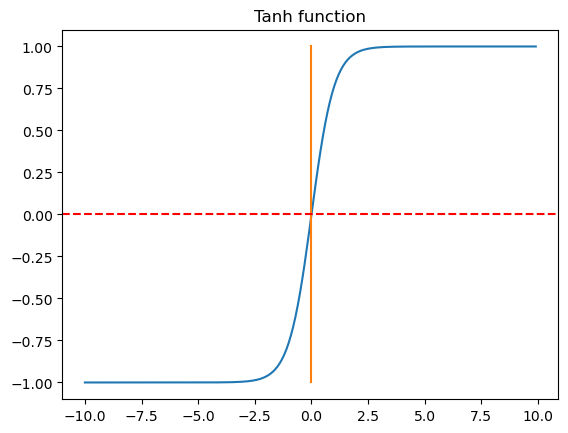

In [19]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.plot([0,0],[1.0, -1.0])
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Tanh function')
plt.show()

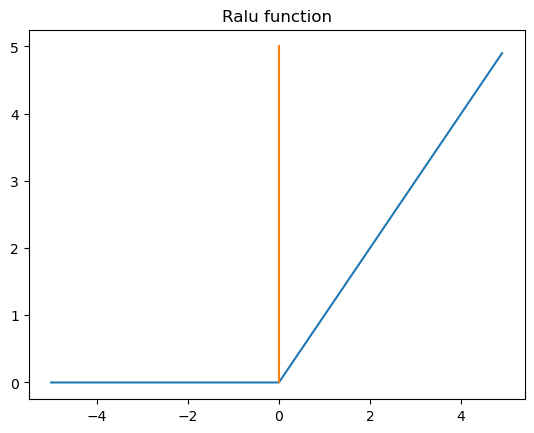

In [22]:
def relu(x):
    return np.maximum(0,x)

x=np.arange(-5.0, 5.0, 0.1)
y=relu(x)

plt.plot(x,y)
plt.plot([0,0],[5.0, 0.0])
plt.title('Ralu function')
plt.show()



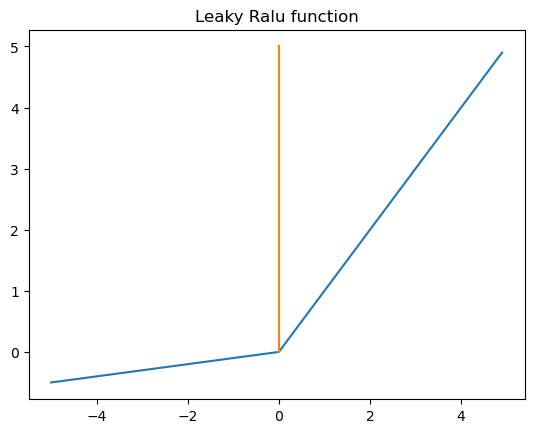

In [24]:
a=0.1

def leaky_relu(x):
    return np.maximum(a*x, x)

x=np.arange(-5.0, 5.0, 0.1)
y=leaky_relu(x)

plt.plot(x,y)
plt.plot([0,0],[5.0, 0.0])
plt.title('Leaky Ralu function')
plt.show()

